In [5]:
import pandas as pd
import yfinance as yf

# Download historical data
df = yf.download('PK', start='2020-01-01', end='2025-12-31')

# Keep relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [7]:
# Shift 'Close' to create the next day's price as the target
df['Next_High'] = df['High'].shift(-1)

# Drop last row (NaN in target)
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_High']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Mean Squared Error: 0.05


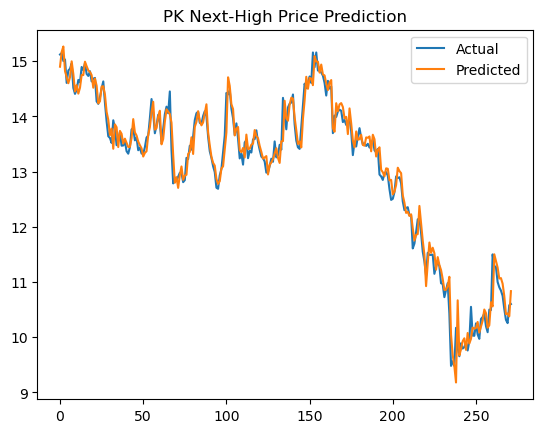

In [9]:
import matplotlib.pyplot as plt

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs. predicted
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('PK Next-High Price Prediction')
plt.legend()
plt.show()

In [10]:
y_test

Date
2024-04-25    15.120227
2024-04-26    15.147307
2024-04-29    15.002876
2024-04-30    15.029956
2024-05-01    14.605687
                ...    
2025-05-20    10.515000
2025-05-21    10.315000
2025-05-22    10.255000
2025-05-23    10.580000
2025-05-27    10.600000
Name: Next_High, Length: 272, dtype: float64

In [11]:
y_pred

array([14.89934234, 15.16838107, 15.26570339, 14.82155587, 14.7116948 ,
       14.59955117, 14.71011824, 14.99631758, 14.7672925 , 14.44997286,
       14.56582794, 14.41156264, 14.51823943, 14.74978426, 14.74714895,
       14.99002548, 14.90742227, 14.83186498, 14.80451266, 14.74737045,
       14.51914922, 14.68411398, 14.55525506, 14.23605368, 14.2715511 ,
       14.53954584, 14.54527759, 14.39613665, 14.08131739, 13.9380703 ,
       13.65853478, 13.77724781, 13.41302544, 13.85448067, 13.80300225,
       13.4442841 , 13.736162  , 13.68411206, 13.50653823, 13.59581056,
       13.51937539, 13.44541737, 13.44645288, 13.60675903, 13.95007059,
       13.70978407, 13.65301019, 13.5439343 , 13.4775131 , 13.42119724,
       13.27221972, 13.33780325, 13.36791152, 13.65950109, 13.80542355,
       14.070079  , 14.26436126, 13.75994982, 13.78605848, 13.98950773,
       14.10136795, 13.49309891, 13.58904418, 13.90322784, 14.1281875 ,
       14.08343675, 14.0420166 , 13.88517486, 13.30513721, 12.79